# Cifar-10 Image Classifiction

The `CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images.

## Problem Definition:

Given an image, can we predict the correct class of this image?

The images are very small (`32x32`) and by visualizing them you will notice how difficult it is to distinguish them even for a human. 

In this notebook we are going to build a CNN model that can classify images of various objects. We have `10` class of images:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

## Evaluation:

We have `10` classes, so if we pick a image and we randomly gues it class, we have `1/10` probability to be true.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the data

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# 2. Data Visualization

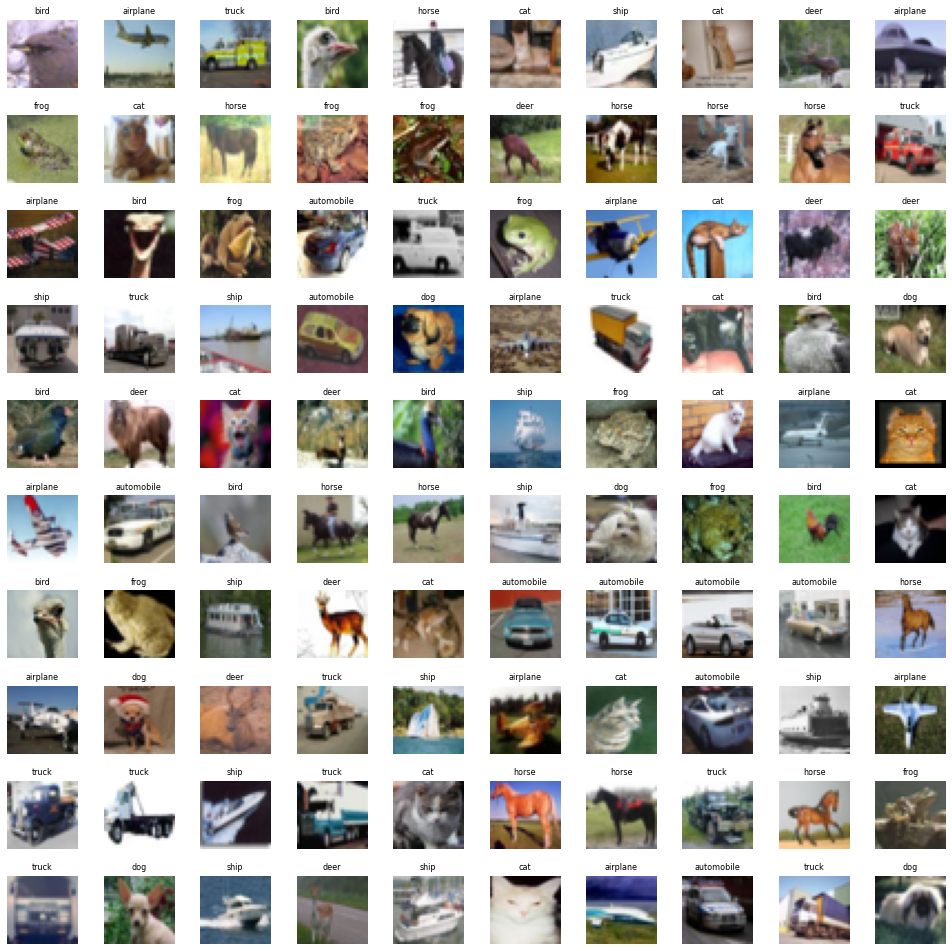

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

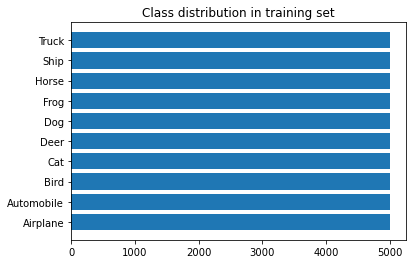

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

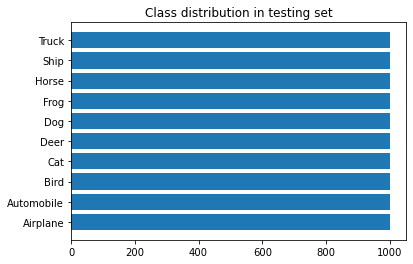

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

# 3. Data Preprocessing

In [ ]:
# Scale the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# 4. Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Data Augmentations

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [ ]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6502 - accuracy: 0.4012 - precision: 0.6258 - recall: 0.1873 - val_loss: 1.2724 - val_accuracy: 0.5463 - val_precision: 0.6856 - val_recall: 0.3937
Epoch 2/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.2435 - accuracy: 0.5606 - precision: 0.7329 - recall: 0.3902 - val_loss: 1.0301 - val_accuracy: 0.6448 - val_precision: 0.7681 - val_recall: 0.5377
Epoch 3/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.0625 - accuracy: 0.6336 - precision: 0.7701 - recall: 0.4946 - val_loss: 0.9447 - val_accuracy: 0.6788 - val_precision: 0.7700 - val_recall: 0.6007
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.9643 - accuracy: 0.6709 - precision: 0.7937 - recall: 0.5536 - val_loss: 0.8893 - val_accuracy: 0.7019 - val_precision: 0.7937 - val_recall: 0.6186
Epoch 5/50
1562/1562 [==================

Epoch 37/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.3958 - accuracy: 0.8646 - precision: 0.9030 - recall: 0.8312 - val_loss: 0.3952 - val_accuracy: 0.8721 - val_precision: 0.8996 - val_recall: 0.8471
Epoch 38/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.3986 - accuracy: 0.8651 - precision: 0.9021 - recall: 0.8326 - val_loss: 0.4413 - val_accuracy: 0.8576 - val_precision: 0.8884 - val_recall: 0.8359
Epoch 39/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.3901 - accuracy: 0.8650 - precision: 0.9026 - recall: 0.8326 - val_loss: 0.4161 - val_accuracy: 0.8665 - val_precision: 0.8937 - val_recall: 0.8435
Epoch 40/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.3876 - accuracy: 0.8672 - precision: 0.9032 - recall: 0.8330 - val_loss: 0.4482 - val_accuracy: 0.8551 - val_precision: 0.8899 - val_recall: 0.8285
Epoch 41/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.382

# 5. Model Evaluation

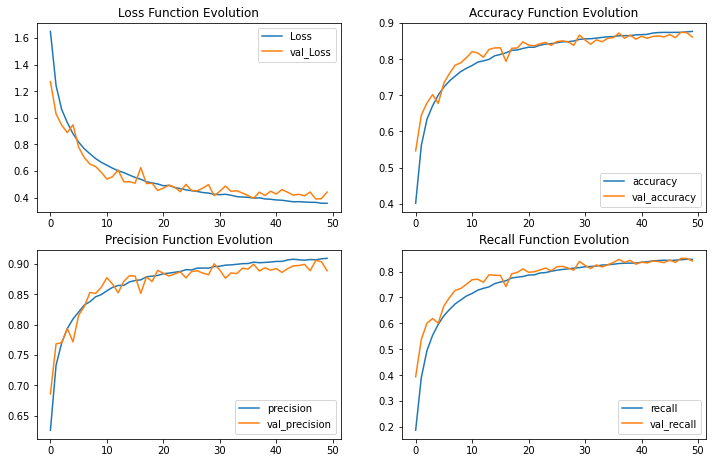

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

10000/10000 [==============================] - 1s 135us/sample - loss: 0.4419 - accuracy: 0.8611 - precision: 0.8889 - recall: 0.8413
Test Accuracy : 86.11%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)

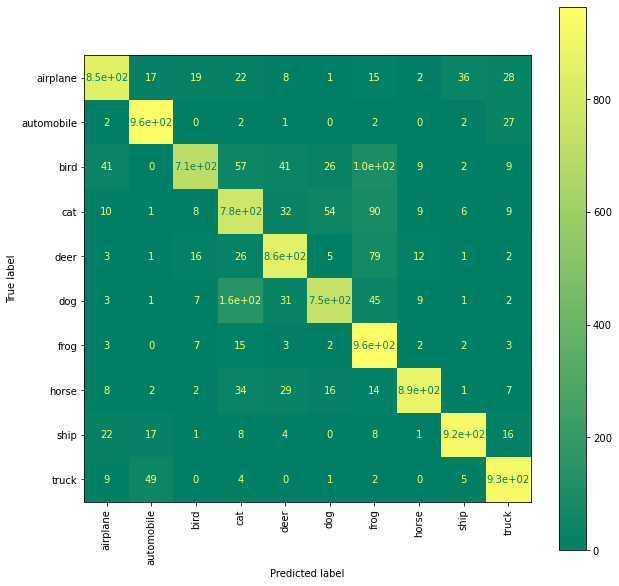

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.92      0.96      0.94      1000
           2       0.92      0.71      0.80      1000
           3       0.71      0.78      0.74      1000
           4       0.85      0.85      0.85      1000
           5       0.88      0.75      0.81      1000
           6       0.73      0.96      0.83      1000
           7       0.95      0.89      0.92      1000
           8       0.94      0.92      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Test on one image

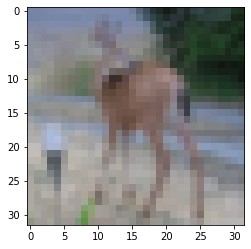

In [ ]:
my_image = X_test[100]
plt.imshow(my_image)

In [ ]:
# that's a Deer
y_test[100]

array([4], dtype=uint8)

In [ ]:
# correctly predicted as a Deer
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([4])

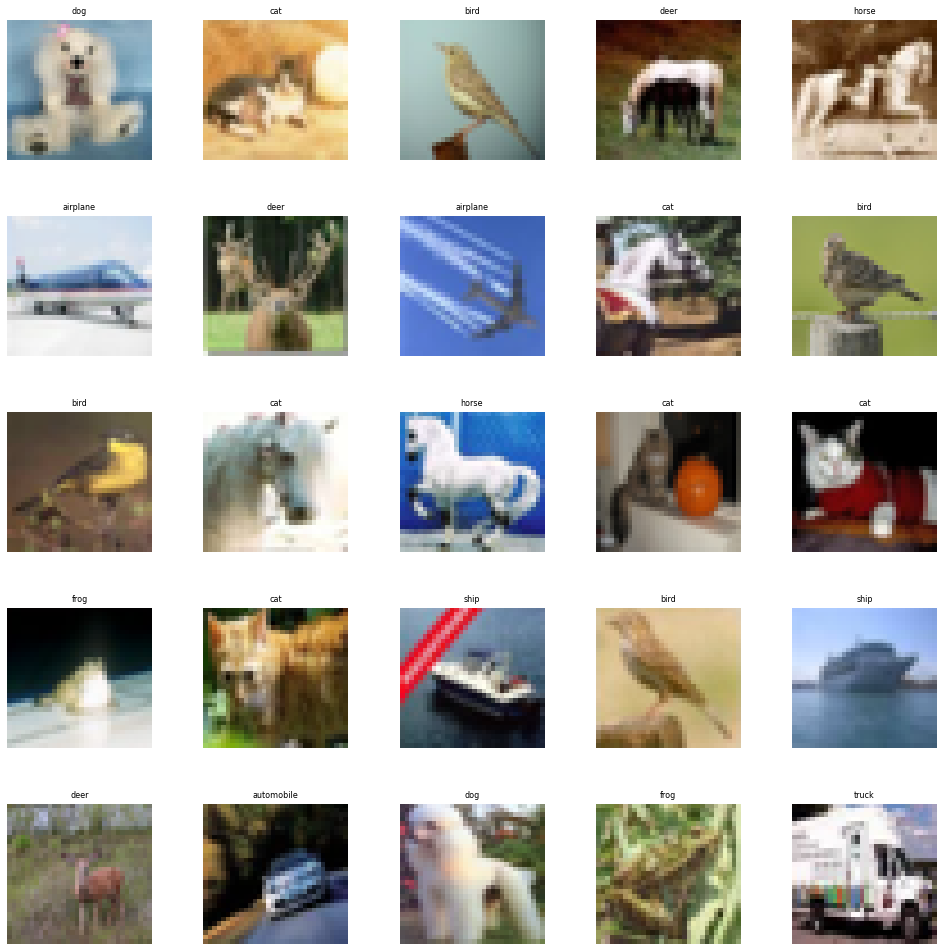

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

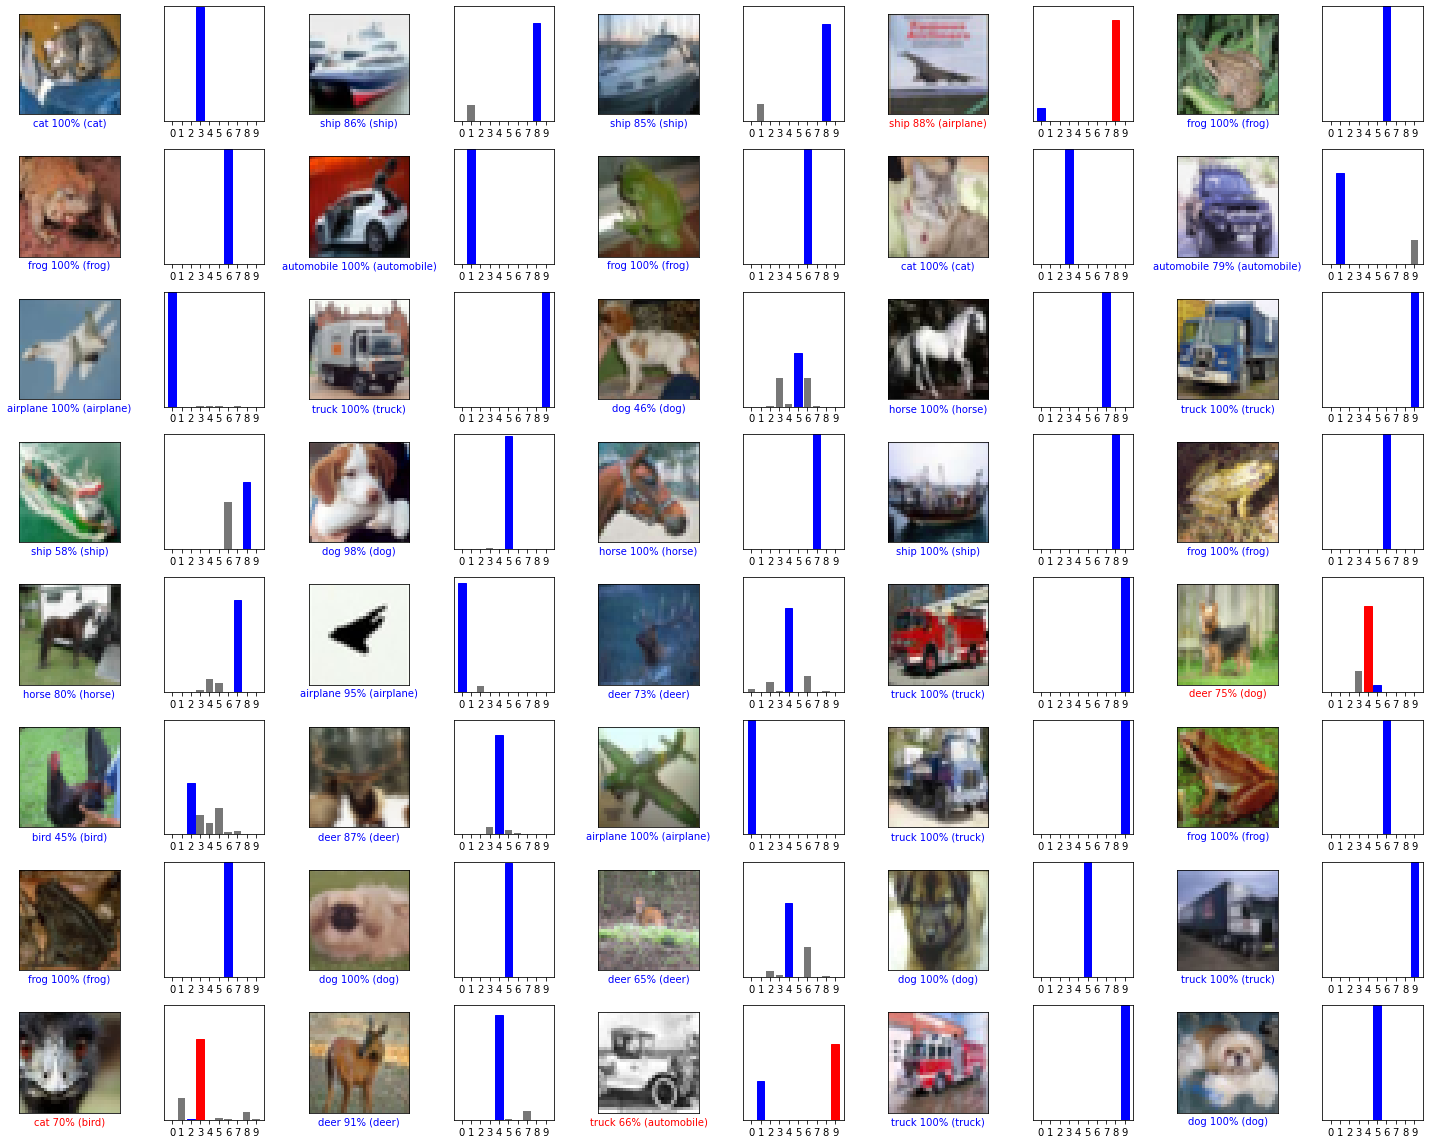

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# 6. DenseNet model for image classification

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
             )

Epoch 1/100
1562/1562 [==============================] - 359s 230ms/step - loss: 1.3803 - accuracy: 0.5371 - val_loss: 1.9530 - val_accuracy: 0.3785
Epoch 2/100
1562/1562 [==============================] - 295s 189ms/step - loss: 1.0961 - accuracy: 0.6274 - val_loss: 1.1492 - val_accuracy: 0.6188
Epoch 3/100
1562/1562 [==============================] - 303s 194ms/step - loss: 0.9876 - accuracy: 0.6712 - val_loss: 1.7555 - val_accuracy: 0.4033
Epoch 4/100
1562/1562 [==============================] - 313s 200ms/step - loss: 1.1270 - accuracy: 0.6245 - val_loss: 1.1575 - val_accuracy: 0.6196
Epoch 5/100
 148/1562 [=>............................] - ETA: 4:42 - loss: 1.2132 - accuracy: 0.6075